In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import joblib
import uuid
import keras_tuner as kt


In [1]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
), tf.config.list_physical_devices('GPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


(True, [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')])

In [3]:
uniqueid = uuid.uuid4().int & (1 << 64)-1


In [4]:
use_pre_trained_embeds = False

In [5]:
dataset_dir = "sentiment140"

model_dir = "models/"
visuals_dir = "visuals/"
tokenizers_dir = "tokenizers/"

# load a preprocessed dataframe see: (https://github.com/3nws/twitter-text-classification/blob/main/notebooks/process_dataframes.ipynb)
df = joblib.load(f"../dataframes/df_{dataset_dir}_1.pkl") 

In [6]:
df.columns=["text", "sentiment"]

In [7]:
df.shape

(1583691, 2)

In [8]:
df.head()

,text,sentiment
0,awww bummer shoulda got david carr third day,0
1,upset cant updat facebook text might cri resul...,0
2,dive mani time ball manag save 50 rest go bound,0
3,whole bodi feel itchi like fire,0
4,behav im mad whi becaus cant see,0


c:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

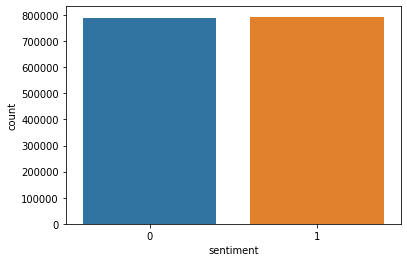

In [9]:

import seaborn as sns

sns.countplot(df.sentiment)


In [10]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.text)


In [11]:
len(counter)

402749

In [12]:
counter

Counter({'awww': 5018,
         'bummer': 1457,
         'shoulda': 348,
         'got': 60673,
         'david': 2444,
         'carr': 90,
         'third': 826,
         'day': 100449,
         'upset': 2942,
         'cant': 62196,
         'updat': 9008,
         'facebook': 4288,
         'text': 5463,
         'might': 9577,
         'cri': 8355,
         'result': 1632,
         'school': 20245,
         'today': 65739,
         'also': 10250,
         'blah': 1469,
         'dive': 267,
         'mani': 8974,
         'time': 63992,
         'ball': 1924,
         'manag': 2495,
         'save': 3647,
         '50': 1278,
         'rest': 5761,
         'go': 136068,
         'bound': 399,
         'whole': 5963,
         'bodi': 2642,
         'feel': 50080,
         'itchi': 447,
         'like': 82703,
         'fire': 1889,
         'behav': 225,
         'im': 176927,
         'mad': 4112,
         'whi': 27425,
         'becaus': 13438,
         'see': 50555,
         'c

In [13]:
counter.most_common(5)

[('im', 176927),
 ('go', 136068),
 ('get', 109408),
 ('day', 100449),
 ('good', 89349)]

In [14]:
num_unique_words = len(counter)

In [15]:
# Split dataset into training and validation set

from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 0], df.iloc[:, 1]

train_sentences, val_sentences, train_labels, val_labels = train_test_split(X, y, test_size=0.4, stratify=y ,random_state=42)

train_sentences = train_sentences.to_numpy()
val_sentences = val_sentences.to_numpy()
train_labels = train_labels.to_numpy()
val_labels = val_labels.to_numpy()


In [16]:
train_sentences.shape, val_sentences.shape, train_labels.shape, val_labels.shape


((950214,), (633477,), (950214,), (633477,))

In [17]:
type(train_sentences), type(val_sentences), type(train_labels), type(val_labels),

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [18]:
train_sentences[:1], train_labels[:1]

(array(['miss nation fist bump day'], dtype=object), array([0]))

In [19]:
num_unique_words


402749

In [20]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 50000
# max_features = num_unique_words

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [21]:
# each word has unique index
word_index = tokenizer.word_index

In [22]:
word_index

{'im': 1,
 'go': 2,
 'get': 3,
 'day': 4,
 'good': 5,
 'work': 6,
 'like': 7,
 'love': 8,
 'dont': 9,
 'today': 10,
 'time': 11,
 'cant': 12,
 'got': 13,
 'thank': 14,
 'want': 15,
 'miss': 16,
 'one': 17,
 'back': 18,
 'lol': 19,
 'know': 20,
 'u': 21,
 'think': 22,
 'see': 23,
 'feel': 24,
 'realli': 25,
 'well': 26,
 'hope': 27,
 'night': 28,
 'still': 29,
 'need': 30,
 'watch': 31,
 'make': 32,
 'new': 33,
 'amp': 34,
 'look': 35,
 'home': 36,
 'come': 37,
 '2': 38,
 'oh': 39,
 'much': 40,
 'last': 41,
 'twitter': 42,
 'morn': 43,
 'great': 44,
 'tomorrow': 45,
 'wish': 46,
 'wait': 47,
 'ill': 48,
 'sad': 49,
 'sleep': 50,
 'haha': 51,
 'bad': 52,
 'tri': 53,
 'fun': 54,
 'onli': 55,
 'right': 56,
 'whi': 57,
 'week': 58,
 'happi': 59,
 'didnt': 60,
 'follow': 61,
 'would': 62,
 'veri': 63,
 'thing': 64,
 'friend': 65,
 'sorri': 66,
 'tonight': 67,
 'say': 68,
 'way': 69,
 'take': 70,
 'gonna': 71,
 'nice': 72,
 'though': 73,
 'ive': 74,
 'better': 75,
 'hate': 76,
 'even': 77,
 '

In [23]:
len_of_vocab = len(word_index)

In [24]:
len_of_vocab, max_features


(280024, 50000)

In [25]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [26]:
print(train_sentences[14:15])
print(train_sequences[14:15])

['haha wors feet ever yuuuuuuuuuuuuuuuk morn shite weather eh']
[[51, 640, 823, 156, 43, 4348, 201, 921]]


In [27]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = max([len(text) for text in train_sequences]) if dataset_dir == "sentiment140" else 32
max_length

28

In [28]:

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((950214, 28), (633477, 28))

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_padded, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_padded, val_labels))


In [30]:
len(train_dataset), len(val_dataset)


(950214, 633477)

In [31]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [32]:
train_dataset, val_dataset


(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 28), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 28), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [33]:
# Check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [34]:
list(reverse_word_index)[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [35]:
list(word_index)[:10]

['im', 'go', 'get', 'day', 'good', 'work', 'like', 'love', 'dont', 'today']

In [36]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [37]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[32, 24, 75, 3653, 38, 5638, 3, 41771]
make feel better cocktail 2 honour get retort


In [38]:
embedding_dim = 128
lstm_dim = embedding_dim//2


if use_pre_trained_embeds:
    embeddings_dictionary = dict()
    glove_file = open('../embeds/glove.6B.300d.txt', 'rb')

    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

    glove_file.close()

    embeddings_matrix = np.zeros((len_of_vocab, embedding_dim))
    for word, index in tokenizer.word_index.items():
        embedding_vector = embeddings_dictionary.get(
            bytes(word, 'utf-8'))
        if embedding_vector is not None:
            embeddings_matrix[index] = embedding_vector


In [39]:

from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, SpatialDropout1D, Dropout, GlobalMaxPool1D, GlobalMaxPool2D, Convolution1D, Flatten
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import L1, L2
from keras import Model

In [40]:
# # remember to clear cache

# embedding_options = [32, 64, 128]
# lstm_options = [16, 32, 64]
# dense_options = [16, 32, 64]
# activation_options = ["relu", "tanh", "sigmoid"]


# # For keras tuner 
# def build_model(hp):
#     model = Sequential()
#     model.add(Embedding(max_features, output_dim=hp.Choice('output_dim', embedding_options),
#                         input_length=max_length, name="embeddinglayer"))
#     model.add(Bidirectional(
#         LSTM(units=hp.Choice('units_1', lstm_options), dropout=hp.Float("dropout", min_value=0,
#                                                                       max_value=0.6), return_sequences=True)))
#     model.add(Bidirectional(
#         LSTM(units=hp.Choice('units_2', lstm_options), dropout=hp.Float("dropout", min_value=0,
#                                                                       max_value=0.6))))
#     model.add(Dense(units=hp.Choice('units_3', dense_options), activation=hp.Choice("activation", activation_options),
#                     kernel_regularizer=L1(
#                         hp.Choice('l1', [0.01, 0.001, 0.1, 0.005, 0.05])),
#                     activity_regularizer=L2(hp.Choice('l2', [0.01, 0.001, 0.1, 0.005, 0.05]))))
#     model.add(Dense(units=hp.Choice('units_4', dense_options), activation=hp.Choice("activation", activation_options),
#                     kernel_regularizer=L1(
#                         hp.Choice('l1', [0.01, 0.001, 0.1, 0.005, 0.05])),
#                     activity_regularizer=L2(hp.Choice('l2', [0.01, 0.001, 0.1, 0.005, 0.05]))))
#     model.add(Dense(1, activation="sigmoid"))
#     loss = BinaryCrossentropy(from_logits=False)
#     optim = Adam(learning_rate=hp.Float("learning_rate", min_value=1e-4,
#                                         max_value=1e-2, sampling="log"))
#     metrics = [
#         "accuracy",
#     ]
#     model.compile(loss=loss, optimizer=optim, metrics=metrics)
#     return model

# tuner = kt.Hyperband(
#     build_model,
#     objective='val_accuracy',
#     max_epochs=10,
#     factor=3,
#     overwrite=True,
#     project_name='nn_model',
#     directory='tuners')


# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# terminate_on_nan = tf.keras.callbacks.TerminateOnNaN()

# tuner.search(train_dataset, epochs=3,
#              shuffle=True, validation_data=val_dataset, verbose=1, callbacks=[stop_early])

# best_model = tuner.get_best_models()[0]
# best_model
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_hps
# tuner.results_summary()
# hypertuned_model = tuner.hypermodel.build(best_hps)

# hypertuned_model.summary()

In [41]:
# type(embeddings_matrix[1][0])

In [42]:
# 'softmax' activation function returns a probability distribution and should be used with from_logits=False in categorical loss function
# if 'softmax' or 'sigmoid' then from_logits=False else from_logits=True
# Binary for 0-1, Categorical for 2 or more classes, SparseCategorical for when labels are integers
# Dropout is used to prevent overfitting by randomly setting inputs to 0 at a low rate
# For stacked LSTMs set return_sequences to True except for the last one
# trainable parameter in Embedding layer should still be set to True when using already trained weights (it is by default anyway)

# 0
def one():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                        input_length=max_length, name="embeddinglayer", weights=[embeddings_matrix], trainable=False))
    model.add(Convolution1D(64, 3, padding='same'))
    model.add(Convolution1D(32, 3, padding='same'))
    model.add(Convolution1D(16, 3, padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(180, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 1
def two():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                               input_length=max_length, name="embeddinglayer"))
    model.add(LSTM(embedding_dim, dropout=0.1))
    model.add(Dense(1, activation="sigmoid"))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
        "binary_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model
    
# 2
def three():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                               input_length=max_length, name="embeddinglayer"))
    model.add(LSTM(embedding_dim, dropout=0.1))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
        "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 3
def four():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                               input_length=max_length, name="embeddinglayer"))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.2)))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
        # "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 4
def five():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                        input_length=max_length, name="embeddinglayer"))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3)))
    model.add(Dense(32, activation="relu", kernel_regularizer=L1(0.01), activity_regularizer=L2(0.01)))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.0001)
    metrics = [
        "accuracy",
        "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 5
def six():
    model = tf.keras.Sequential()
    model.add(Embedding(
        len_of_vocab, embedding_dim, input_length=max_length))
    model.add(SpatialDropout1D(0.4))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.05, recurrent_dropout=0.2)))
    model.add(Dense(2, activation='softmax'))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = ["accuracy",
               "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 6
def seven():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                        input_length=max_length, name="embeddinglayer", weights=[embeddings_matrix], trainable=True))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3)))
    model.add(Dense(32, activation="relu", kernel_regularizer=L1(0.01),
                    activity_regularizer=L2(0.01)))
    model.add(Dense(1, activation="sigmoid"))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=1e-4)
    metrics = [
        "accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 7
def eight():
    model = Sequential()
    model.add(Embedding(len_of_vocab, 128))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(GlobalMaxPool1D())
    model.add(Dense(20, activation="relu"))
    model.add(Dropout(0.05))
    model.add(Dense(1, activation="sigmoid"))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=1e-4)
    metrics = [
        "accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 8
def nine():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                        input_length=max_length, name="embeddinglayer"))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3)))
    model.add(Dense(32, activation="relu", kernel_regularizer=L1(0.01),
                    activity_regularizer=L2(0.01)))
    model.add(Dense(1, activation="softmax"))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=1e-4)
    metrics = [
        "accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 9
def ten():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                        input_length=max_length, name="embeddinglayer", weights=[embeddings_matrix], trainable=True))
    # Convolutional model (3x conv, flatten, 2x dense)
    model.add(Convolution1D(64, 3, padding='same'))
    model.add(Convolution1D(32, 3, padding='same'))
    model.add(Convolution1D(16, 3, padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(180, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])
    return model

# 10
def eleven():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim,
                        input_length=max_length, name="embeddinglayer"))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3)))
    model.add(Dense(32, activation="relu", kernel_regularizer=L1(0.01),
                    activity_regularizer=L2(0.01)))
    model.add(Dense(1, activation="sigmoid"))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=1e-4)
    metrics = [
        "accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model


In [43]:
max_features, embedding_dim, max_length, len_of_vocab


(50000, 128, 28, 280024)

In [44]:
models = [
    one,
    two,
    three,
    four,
    five,
    six,
    seven,
    eight,
    nine,
    ten,
    eleven
]

model_to_use = -1

model_idx = 6 if use_pre_trained_embeds else model_to_use


In [45]:
model = models[model_idx]()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeddinglayer (Embedding)  (None, 28, 128)           6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 28, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,601,793
Trainable params: 6,601,793
Non-

In [46]:
from tensorflow import keras
# specifying batch_size is useless in .fit() if you have data in form of dataset

history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1, callbacks=[
                    keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=1)])
# history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1)


Epoch 1/10
 1291/14848 [=>............................] - ETA: 5:54 - loss: 2.4743 - accuracy: 0.6946

KeyboardInterrupt: 

In [ ]:

from sklearn.metrics import classification_report

train_pred = model.predict(train_padded)
train_pred = [np.argmax(train_pre) for train_pre in train_pred]
print(classification_report(train_labels, train_pred))

In [ ]:
from sklearn.metrics import roc_auc_score

val_pred = model.predict(val_padded)
val_pred = [np.argmax(val_pre) for val_pre in val_pred]
print("ROC AUC: ", roc_auc_score(val_labels, val_pred))

In [ ]:
# # For debugging purposes
# outputs = [layer.output for layer in model.layers]

# debug_model = Model(inputs=model.input,
#                     outputs=outputs)
# features = debug_model.predict(val_padded)



# for feature, output in zip(features, outputs):
#     print(val_sentences[1])
#     print(output.name)
#     print(feature.shape)
#     print(feature[1])
#     break

In [ ]:

val_loss, val_acc = model.evaluate(val_dataset)
val_loss, val_acc


In [ ]:
model_name = models[model_idx].__name__
model_export = f"NN_model_{model_name}_{uniqueid}_{val_acc}"
vis_dir = f'../{visuals_dir}/{model_export}'
model_save_dir = f'../{model_dir}/{model_export}'
tokenizer_dir = f'../{tokenizers_dir}/{uniqueid}'

# plotting training graph
plt.plot(history.history['loss'])
plt.savefig(f'{vis_dir}.png')


In [ ]:
# # Only for BinaryCrossentropy
# predictions = [1 if p > 0.5 else 0 for p in val_predictions]
# predictions

In [ ]:
sentiments = {'negative': 0, 'positive': 1}


In [ ]:
val_predictions = [np.argmax(val_prediction) for val_prediction in val_predictions]
val_predictions
# val_predictions = [np.where(val_prediction == max(val_prediction))
#                for val_prediction in val_predictions]

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

vis_dir = "../visuals/"
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.savefig(f'{vis_dir}_loss_acc.png')


In [ ]:
model.save(model_dir)


In [ ]:
loaded_model = load_model(model_dir)


In [ ]:
joblib.dump(tokenizer, f'{tokenizer_dir}tokenizer_2.pkl')


In [ ]:
loaded_model.summary()

In [ ]:
loaded_tokenizer = joblib.load(f'{tokenizer_dir}tokenizer_2.pkl')

In [ ]:
loaded_tokenizer
